# Laboratorio 02 - Modelación y Simulación

## Ejercicio 1
1. **¿Qué es el método de Euler y cómo aproxima las soluciones a las EDO?**

   El método de Euler es un procedimiento numérico sencillo para aproximar soluciones a ecuaciones diferenciales ordinarias (EDO) de primer orden. Dado un problema de la forma \(\frac{dy}{dx} = f(x,y)\) con una condición inicial \(y(x_0) = y_0\), este método aproxima la solución construyendo una secuencia de valores utilizando la fórmula de recurrencia:

   \[
   y_{n+1} = y_n + h \cdot f(x_n, y_n)
   \]

   donde \(h\) es el tamaño del paso. Comenzando en el punto inicial \((x_0, y_0)\), el método usa la pendiente dada por \(f(x_n, y_n)\) para estimar el valor siguiente \(y_{n+1}\) a una distancia \(h\) del punto anterior en el eje \(x\).


2. ¿Cuáles son las ventajas y desventajas del método de Euler en comparación con otros métodos numéricos para EDO? (Mencione al menos 1 ventaja y 1 desventaja)
   **Ventaja**
   El método de Euler es simple y fácil de implementar. La sencillez lo hace útil para obtener una comprensión básica de cómo se pueden aproximar las soluciones a las EDO.
   **Desventaja**
   Este método tiene una presición limitada y puede ser ineficiente para problemas donde se requiere una alta presición, ya que tiende a acumular errores de truncamiento. Métodos más avanzados como el método de Runge-Katta tienen mayor presición y estabilidad.

3. ¿Cómo afecta la elección del tamaño de paso (h) a la precisión del método de Euler?
   Un tamaño más pequeño generalmente aumenta la presición, ya que reduce el error de truncamiento, sin embargo esto implica tener que hacer más cálculos lo que aumenta el costo computacional. Mientras que un tamaño más grande reduce dicha cantidad de cálculos pero puede incrementar el error, haciendo que la solución se desvie de la correcta. Es por esto que es de suma importancia elegir un tamaño de paso que funcione para la aplicación y que puede computarse en un tiempo razonable.

## Ejercicio 2

### 2.1 Crecimiento poblacional

Considere el siguiente modelo de crecimiento poblacional

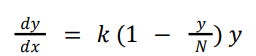

Después de 4 días, una población inicial de mariposas de 15 crece a 56. Si el ecosistema restringido alberga 300 mariposas, **¿cuántas mariposas habrá en 12 días?** Suponiendo que la población de mariposas crece más rápido cuando hay 150 mariposas, **¿cuándo sucede esto?**

**Nota:** Pueden usar la función `fsolve` de `scipy.optimize`

In [6]:
import numpy as np

# función de crecimiento
def crecimiento(k, n, y):
    return k * (1 - (y / n)) * y

# Método de Euler para aproximar la solución de la ecuación diferencial
def euler_method(k, n, y0, t0, tf, dt):
    t = np.arange(t0, tf, dt)
    y = np.zeros(t.shape)
    y[0] = y0
    for i in range(1, len(t)):
        y[i] = y[i-1] + crecimiento(k, n, y[i-1]) * dt
    return y[-1]

# Datos proporcionados
y0 = 15  # Población inicial
y4 = 56  # Población después de 4 días
n = 300  # Capacidad de carga
dt = 1   # Intervalo de tiempo en días

# Estimación de k
# Asumimos que k es constante y usamos los valores de población en t=0 y t=4 para estimar k
# Esta es una simplificación y puede no ser precisa
k_estimado = (np.log(y4/y0) / 4) / (1 - ((y0 + y4) / (2 * n)))

# Predicción del tamaño de la población en 12 días
tamaño_12_días = euler_method(k_estimado, n, y0, 0, 12, dt)

print(f"El tamaño estimado de la población en 12 días es: {tamaño_12_días:.2f}")

El tamaño estimado de la población en 12 días es: 212.54


In [7]:
import numpy as np

# Parámetros del modelo
r = 0.1  # Tasa intrínseca de crecimiento (ejemplo)
N = 300  # Capacidad de carga
P0 = 10  # Población inicial
target_P = 150  # Población objetivo

# Método de Euler para simular la ecuación logística
def euler_logistic(r, N, P0, target_P, dt=0.1):
    P = P0
    t = 0
    while P < target_P:
        dP = r * P * (1 - P / N) * dt
        P += dP
        t += dt
    return t

# Calcular el tiempo cuando la población alcanza 150
tiempo = euler_logistic(r, N, P0, target_P)

print(f"La población de mariposas alcanza 150 más rápido en t = {tiempo:.2f} días. ")

La población de mariposas alcanza 150 más rápido en t = 33.80 días. 


### 2.2 Crecimiento Epidemiológico
En un pueblo aislado se propaga una enfermedad según el modelo SIR. Inicialmente hay 990 individuos susceptibles (S), 10 individuos infectados (I) y 0 individuos recuperados (R). La tasa de infección (𝛽) es 0.3 y la tasa de recuperación (𝛾) es 0.1. Utilizando el método de Euler, estime el número de individuos susceptibles, infectados y recuperados durante un período de 50 días. Utilice un tamaño de paso (Δt) de 0.1 días.
        


In [6]:
# Parámetros del modelo
beta = 0.3  # Tasa de infección
gamma = 0.1  # Tasa de recuperación
S0 = 990  # Población inicial de susceptibles
I0 = 10  # Población inicial de infectados
R0 = 0  # Población inicial de recuperados
dt = 0.1  # Tamaño de paso
días = 50  # Número de días

# Método de Euler para simular el modelo SIR
def euler_sir(beta, gamma, S0, I0, R0, dt, días):
    N = S0 + I0 + R0
    S, I, R = S0, I0, R0
    sus, inf, rec = [S], [I], [R]
    for _ in range(int(días/dt)):
        dS = -beta * S * I / N
        dR = gamma * I
        dI = -(dS + dR)
        S += dS * dt
        I += dI * dt
        R += dR * dt
        sus.append(S)
        inf.append(I)
        rec.append(R)
    return sus, inf, rec

# Simular el modelo SIR
susceptibles, infectados, recuperados = euler_sir(beta, gamma, S0, I0, R0, dt, días)

print(f"Después de {días} días:")
print(f"Individuos susceptibles: {int(susceptibles[-1])}")
print(f"Individuos infectados: {int(infectados[-1])}")
print(f"Individuos recuperados: {int(recuperados[-1])}")




Después de 50 días:
Individuos susceptibles: 81
Individuos infectados: 88
Individuos recuperados: 830
